# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL //
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city //
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response['coord']['lat']
        city_lng = weather_response['coord']['lon']
        city_max_temp = weather_response['main']['temp_max']
        city_humidity = weather_response['main']['humidity']
        city_clouds = weather_response['clouds']['all']
        city_wind = weather_response['wind']['speed']
        city_country = weather_response['name']
        city_date = weather_response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        time.sleep(1)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | puerto madryn
Processing Record 4 of Set 1 | pisco
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | avera
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | abu samrah
Processing Record 12 of Set 1 | tandil
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | cambe
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | yerkoy
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | ouallam
Processing Record 21 of Set 1 | saint-pierre
Processing Record 22 of Set 1 | samarai
Processing Record 23 of Se

Processing Record 39 of Set 4 | grand forks
Processing Record 40 of Set 4 | berlevag
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | seymchan
Processing Record 43 of Set 4 | vanimo
Processing Record 44 of Set 4 | barraute
Processing Record 45 of Set 4 | aksarka
Processing Record 46 of Set 4 | rorvik
Processing Record 47 of Set 4 | pascagoula
Processing Record 48 of Set 4 | yerbogachen
Processing Record 49 of Set 4 | carnarvon
Processing Record 0 of Set 5 | velyka pysarivka
Processing Record 1 of Set 5 | abaza
Processing Record 2 of Set 5 | sorong
Processing Record 3 of Set 5 | kitimat
Processing Record 4 of Set 5 | clinton
Processing Record 5 of Set 5 | soyo
Processing Record 6 of Set 5 | marawi
Processing Record 7 of Set 5 | bathsheba
Processing Record 8 of Set 5 | tilichiki
Processing Record 9 of Set 5 | ligayan
Processing Record 10 of Set 5 | malakal
Processing Record 11 of Set 5 | edd
Processing Record 12 of Set 5 | castro
Processing Record 13 of Set 5 | jumla
P

Processing Record 30 of Set 8 | cacapava do sul
Processing Record 31 of Set 8 | banugao
Processing Record 32 of Set 8 | merano
Processing Record 33 of Set 8 | sioux lookout
Processing Record 34 of Set 8 | manbij
Processing Record 35 of Set 8 | chabahar
Processing Record 36 of Set 8 | tarpon springs
Processing Record 37 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | tiznit
Processing Record 40 of Set 8 | kropotkin
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | prachuap khiri khan
Processing Record 43 of Set 8 | gamba
Processing Record 44 of Set 8 | den helder
Processing Record 45 of Set 8 | langham
Processing Record 46 of Set 8 | shaowu
Processing Record 47 of Set 8 | mikhaylovka
Processing Record 48 of Set 8 | cap malheureux
Processing Record 49 of Set 8 | zitacuaro
Processing Record 0 of Set 9 | poronaysk
Processing Record 1 of Set 9 | dalby
Processing Record 2 of Set 9 | gympie
Processing Re

Processing Record 17 of Set 12 | saravena
Processing Record 18 of Set 12 | tessalit
Processing Record 19 of Set 12 | sadri
Processing Record 20 of Set 12 | minot
Processing Record 21 of Set 12 | rumoi
Processing Record 22 of Set 12 | vyazemskiy
Processing Record 23 of Set 12 | thinadhoo
Processing Record 24 of Set 12 | sabha
Processing Record 25 of Set 12 | kibala
Processing Record 26 of Set 12 | hofn
Processing Record 27 of Set 12 | chishtian mandi
Processing Record 28 of Set 12 | verkhnyaya maksakovka
Processing Record 29 of Set 12 | awjilah
Processing Record 30 of Set 12 | yakovlevskoye
Processing Record 31 of Set 12 | kushima
Processing Record 32 of Set 12 | taixing
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | dubuque
Processing Record 35 of Set 12 | merauke
Processing Record 36 of Set 12 | khandyga
Processing Record 37 of Set 12 | castanas
Processing Record 38 of Set 12 | pinega
Processing Record 39 of Set 12 | yanam
Processing Record 40 of Set 12

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,2.73,48,0,5.14,Saint Paul Harbor,1669954033
1,vardo,70.3705,31.1107,0.99,93,100,1.03,Vardø,1669954034
2,puerto madryn,-42.7692,-65.0385,22.53,26,58,4.45,Puerto Madryn,1669953772
3,pisco,-13.7000,-76.2167,19.03,82,0,1.54,Pisco,1669954036
4,nikolskoye,59.7035,30.7861,-10.11,85,97,1.64,Nikolskoye,1669954038


In [39]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,2.73,48,0,5.14,Saint Paul Harbor,1669954033
1,vardo,70.3705,31.1107,0.99,93,100,1.03,Vardø,1669954034
2,puerto madryn,-42.7692,-65.0385,22.53,26,58,4.45,Puerto Madryn,1669953772
3,pisco,-13.7000,-76.2167,19.03,82,0,1.54,Pisco,1669954036
4,nikolskoye,59.7035,30.7861,-10.11,85,97,1.64,Nikolskoye,1669954038


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

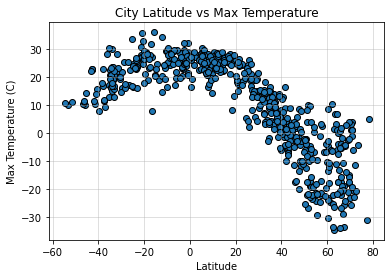

In [81]:
# Build scatter plot for latitude vs. temperature
LatvTemp = plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(alpha=0.5)

# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

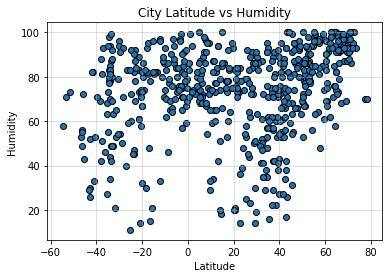

In [82]:
# Build the scatter plots for latitude vs. humidity
LatvHumidity = plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(alpha=0.5)

# Save the figure
# plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

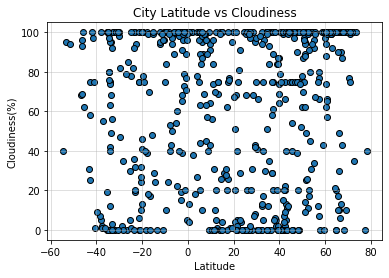

In [83]:
# Build the scatter plots for latitude vs. cloudiness
LatvCoud = plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(alpha=0.5)

# Save the figure
# plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

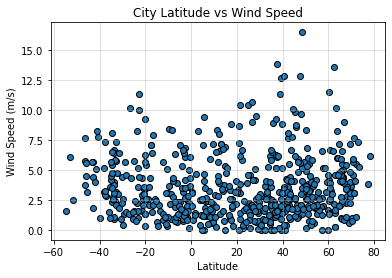

In [84]:
# Build the scatter plots for latitude vs. wind speed
LatvWind = plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(alpha=0.5)

# plt.figure(figsize=(20,20))

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def linearRegression(x_values, y_values, annotate_loc, title, x_label, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, annotate_loc,fontsize=15,color="red")

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.5)

    print("pvalue",pvalue)
    print("rvalue",rvalue)

    plt.show()

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,2.73,48,0,5.14,Saint Paul Harbor,1669954033
1,vardo,70.3705,31.1107,0.99,93,100,1.03,Vardø,1669954034
4,nikolskoye,59.7035,30.7861,-10.11,85,97,1.64,Nikolskoye,1669954038
6,tuktoyaktuk,69.4541,-133.0374,-14.78,91,100,7.17,Tuktoyaktuk,1669954040
7,hobyo,5.3505,48.5268,26.46,80,44,7.09,Hobyo,1669954042


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto madryn,-42.7692,-65.0385,22.53,26,58,4.45,Puerto Madryn,1669953772
3,pisco,-13.7000,-76.2167,19.03,82,0,1.54,Pisco,1669954036
5,avarua,-21.2078,-159.7750,27.03,83,75,2.57,Avarua,1669954039
10,tandil,-37.3217,-59.1332,9.27,93,55,2.87,Tandil,1669954046
12,mataura,-46.1927,168.8643,10.27,49,93,3.79,Mataura,1669954049


###  Temperature vs. Latitude Linear Regression Plot

pvalue 1.5486673786177892e-117
rvalue -0.8524406999935278


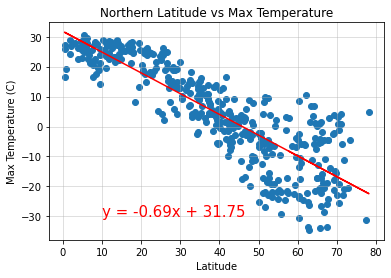

In [96]:
# Linear regression on Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10,-30), "Northern Latitude vs Max Temperature",
                 'Latitude', 'Max Temperature (C)'
)


pvalue 1.3279664711812206e-19
rvalue 0.6070141168947232


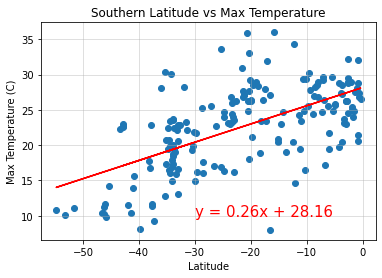

In [100]:
# Linear regression on Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-30, 10), "Southern Latitude vs Max Temperature",
                 'Latitude', 'Max Temperature (C)'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

pvalue 3.582084844348942e-10
rvalue 0.30260744566238845


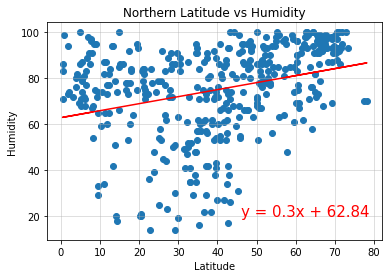

In [103]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (46, 20), "Northern Latitude vs Humidity",
                 'Latitude', 'Humidity'
)

pvalue 3.691230897409153e-05
rvalue 0.3016007236426184


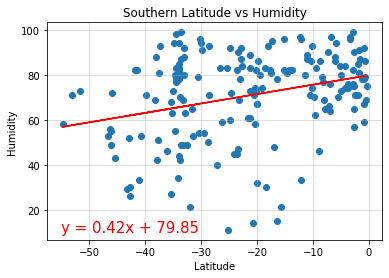

In [106]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 10), "Southern Latitude vs Humidity",
                 'Latitude', 'Humidity'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

pvalue 3.329406714875101e-05
rvalue 0.20292565046883118


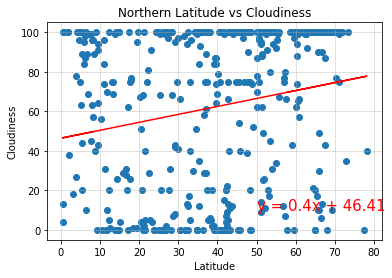

In [107]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (50, 10), "Northern Latitude vs Cloudiness",
                 'Latitude', 'Cloudiness'
)

pvalue 0.010094610924343874
rvalue 0.1907798863432279


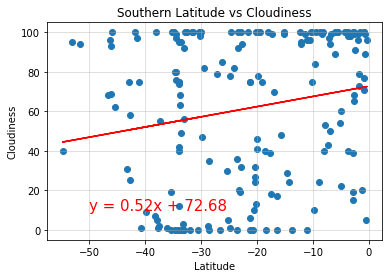

In [108]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-50, 10), "Southern Latitude vs Cloudiness",
                 'Latitude', 'Cloudiness'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

pvalue 0.0181754294138022
rvalue 0.11632671549074784


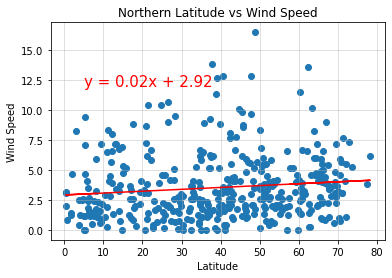

In [110]:
# Northern Hemisphere
linearRegression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (5, 12), "Northern Latitude vs Wind Speed",
                 'Latitude', 'Wind Speed'
)

pvalue 0.005401220138909753
rvalue -0.20599477943555858


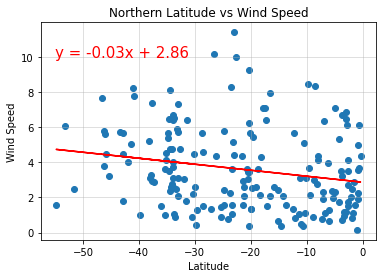

In [113]:
# Southern Hemisphere
linearRegression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-55, 10), "Northern Latitude vs Wind Speed",
                 'Latitude', 'Wind Speed'
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE